In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
#from nltk.corpus import stopwords
from collections import Counter


In [2]:
def getReviews ():
    # Get the name of files of the folder scraped.
    # Get the top 50 rows and create a list of dataframes.
    csv_files = glob.glob("scraped/*.csv")
    names = [name.strip('scraped/').strip('.csv') for name in csv_files]
    csv_reviews = []
    review_files = pd.DataFrame ()
    for (i, file) in enumerate (csv_files):
        csv = pd.read_csv (file)["review-content"]
        csv = csv.dropna()[:50].reset_index().drop('index', axis=1)
        csv.columns = [names[i]]
        csv_reviews.append (csv)
        review_files = pd.concat ([review_files, csv], axis=1)
    return (review_files, csv_reviews, names, csv_files)

review_files, csv_reviews, names, csv_files = getReviews ()
review_files.to_csv ('first50_reviews.csv')

In [3]:
def createWordList (reviews):
    # Create a list, where each element of that list is all the reviews put together in a string.
    word_list = []
    for (i, csv) in enumerate (reviews):
        all_words = ""
        for (index, row) in csv.iterrows():
            all_words += row [names[i]]
        all_words = all_words.lower()
        word_list.append (re.sub('[()!@%^&*-+\$.,?"#]', ' ', all_words))
    return word_list

word_list = createWordList (csv_reviews)

In [23]:
def findWordFreq (word_list, names, threshold = 10):
    # Count the word frequency in each element of the list.
    # Filter out the common words that do not provide any valuable information.
    common_words = pd.read_csv ('commonwords.csv')['extiw'].values.tolist()
    keywords = pd.read_csv ('keywords.csv')['KEYS'].values.tolist()
    csv_counter = {}
    for i in range (len (word_list)):
        unique_words = Counter (word_list[i].split())
        filter_unique_words = {}
        for key in unique_words:
            if (not (key in common_words)) and ((key in keywords) or (unique_words[key] > threshold)):
                filter_unique_words[key] = unique_words[key] 
        csv_counter[names[i]] = filter_unique_words
    return csv_counter

csv_counter = findWordFreq (word_list, csv_files)
#csv_counter
#csv_files[0]

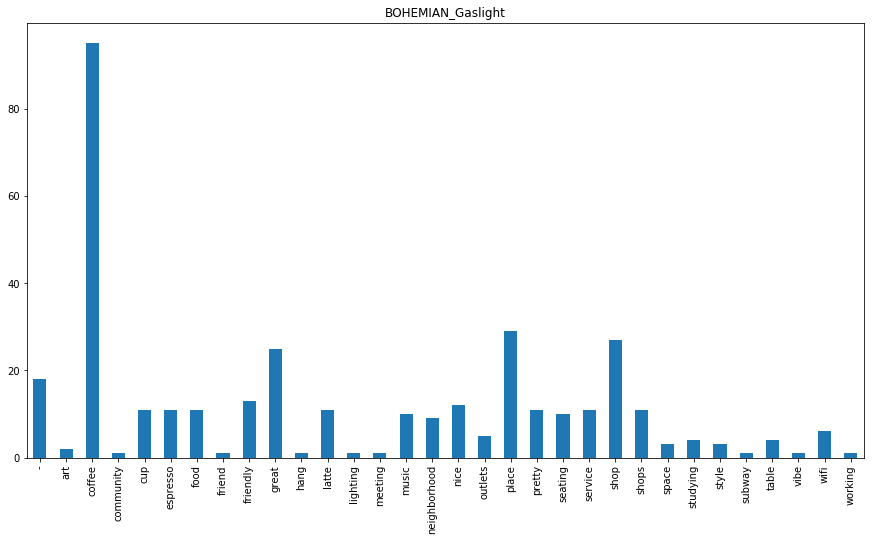

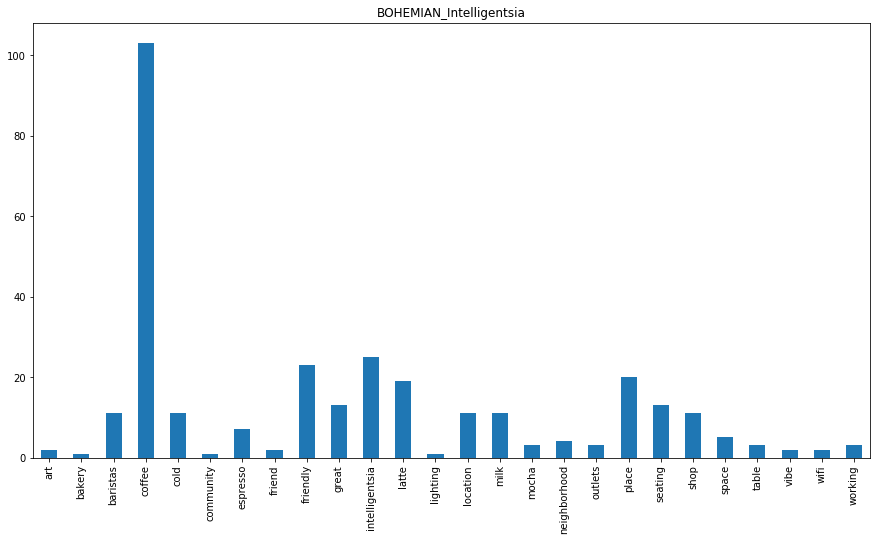

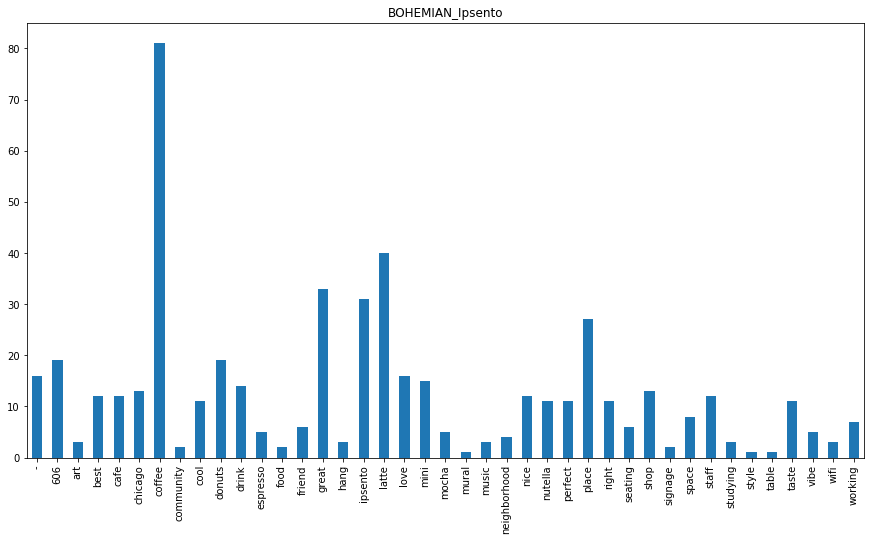

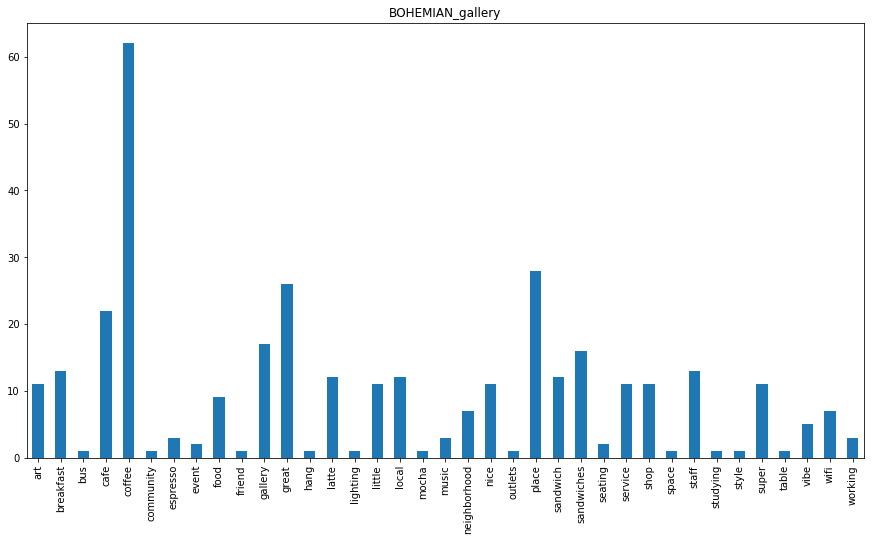

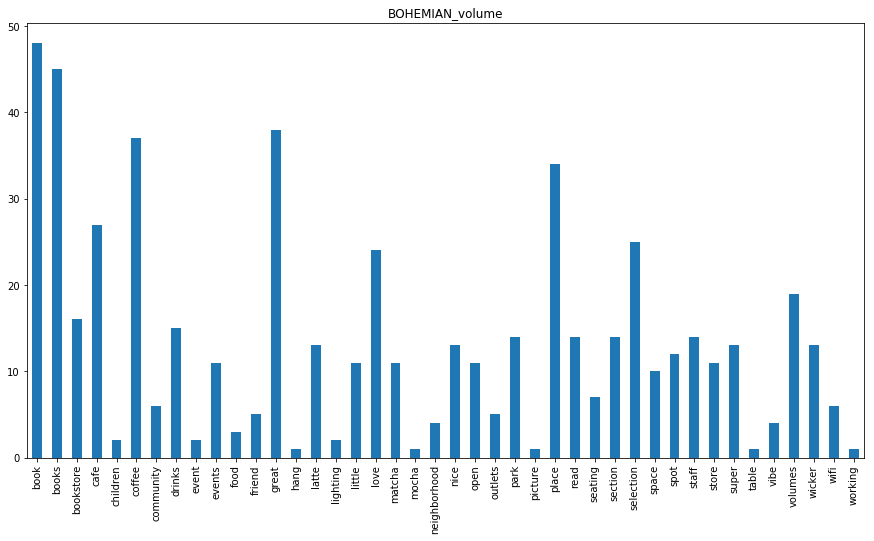

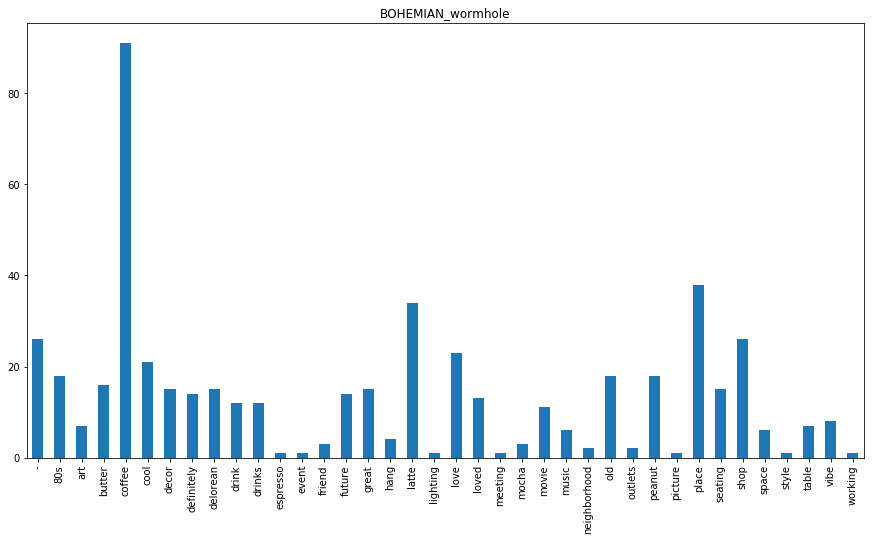

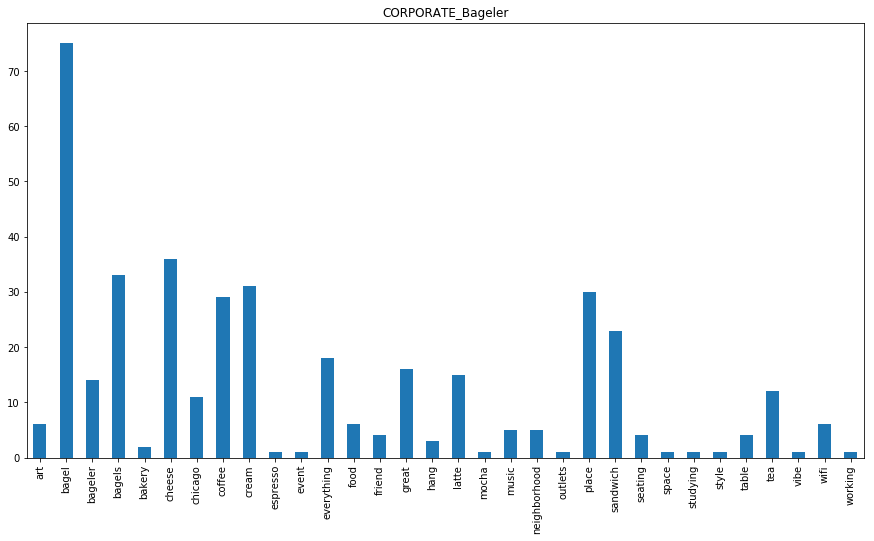

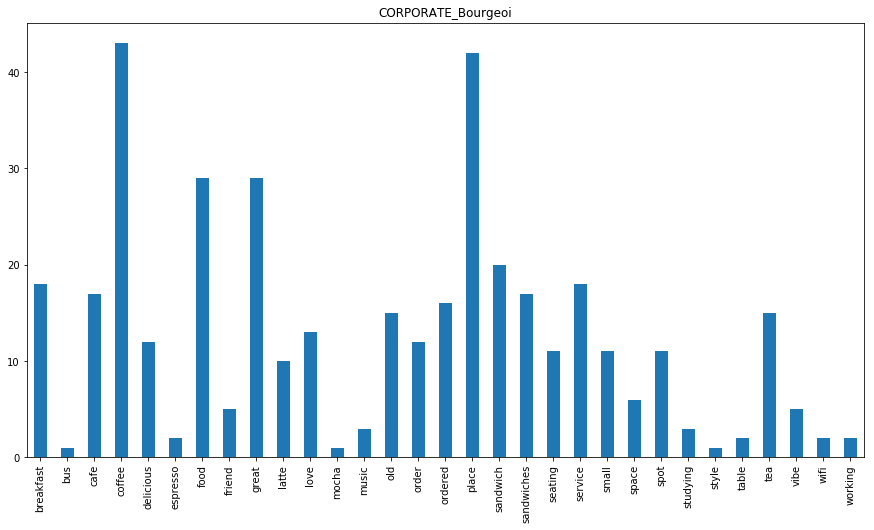

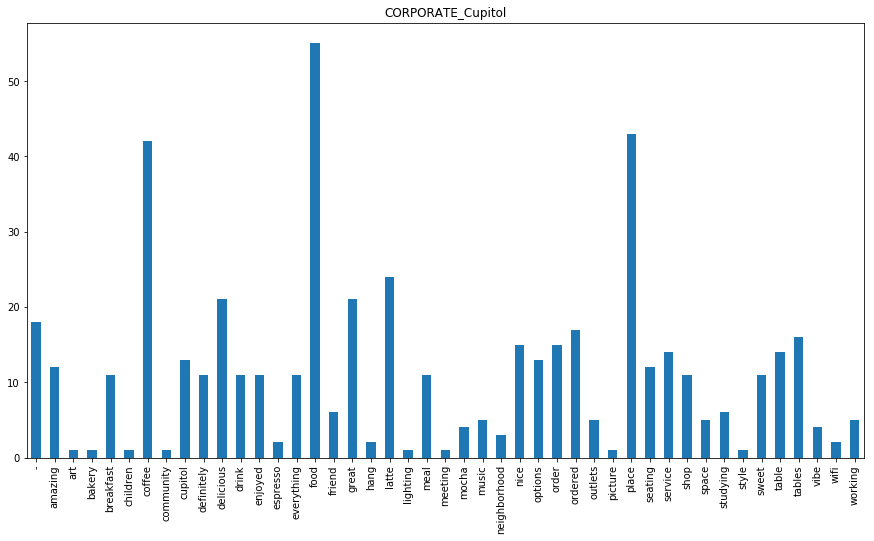

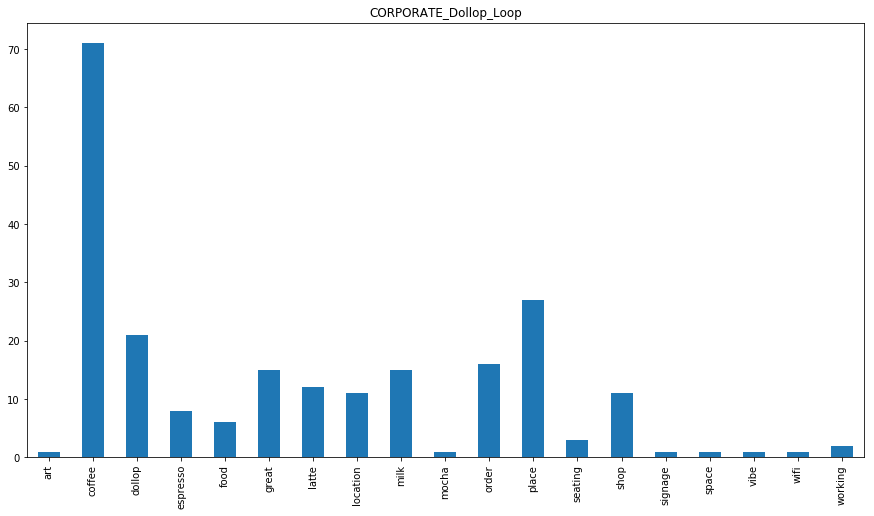

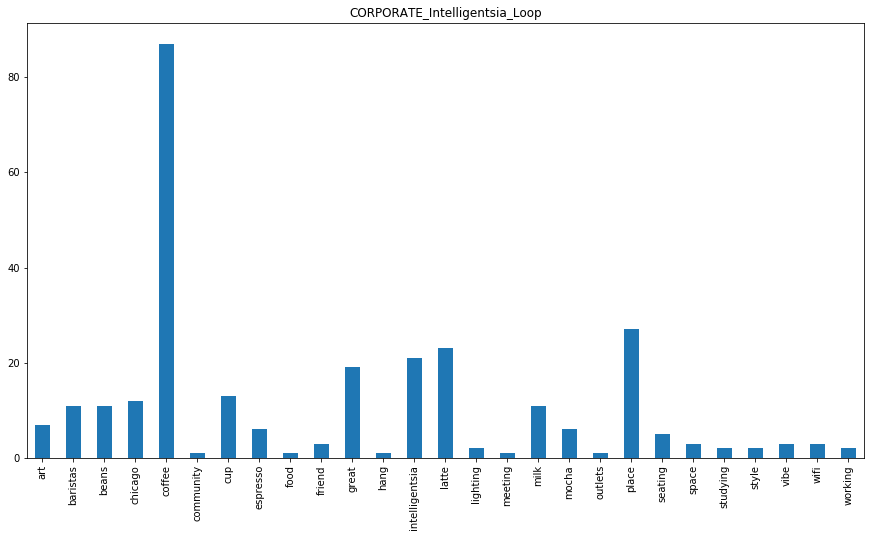

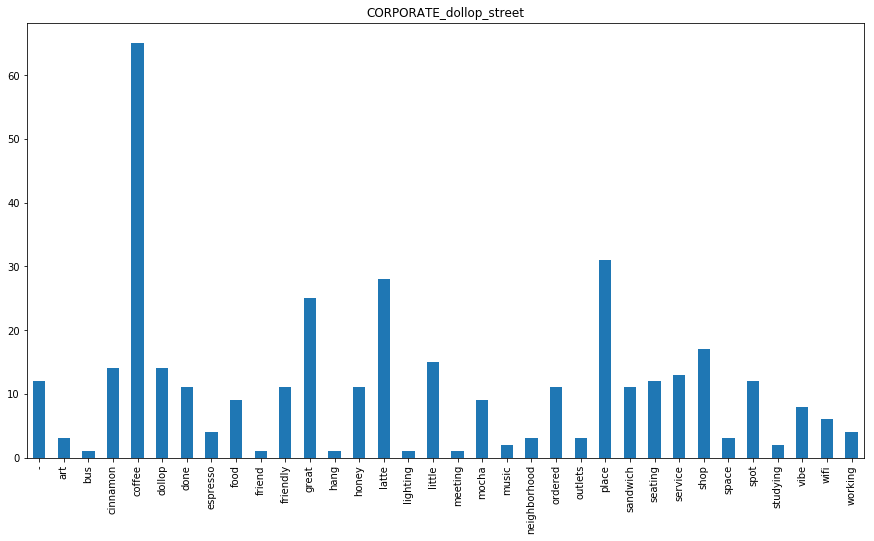

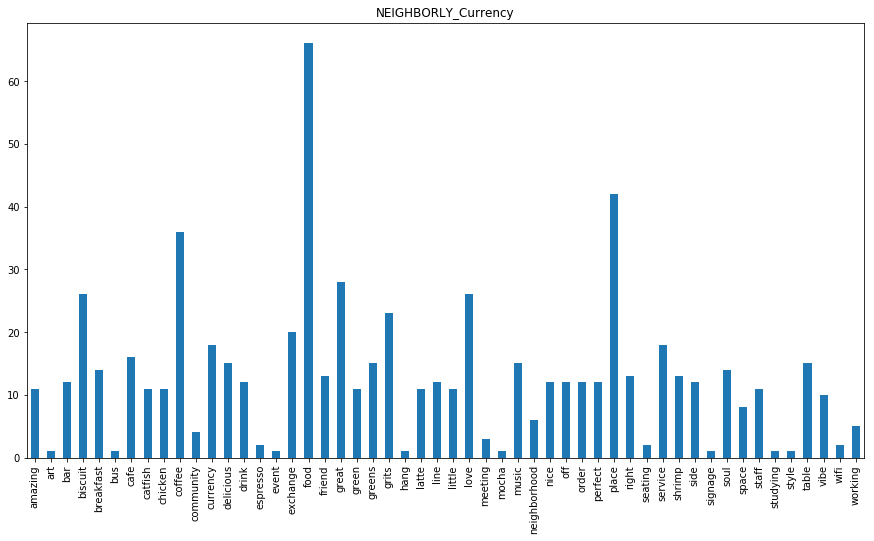

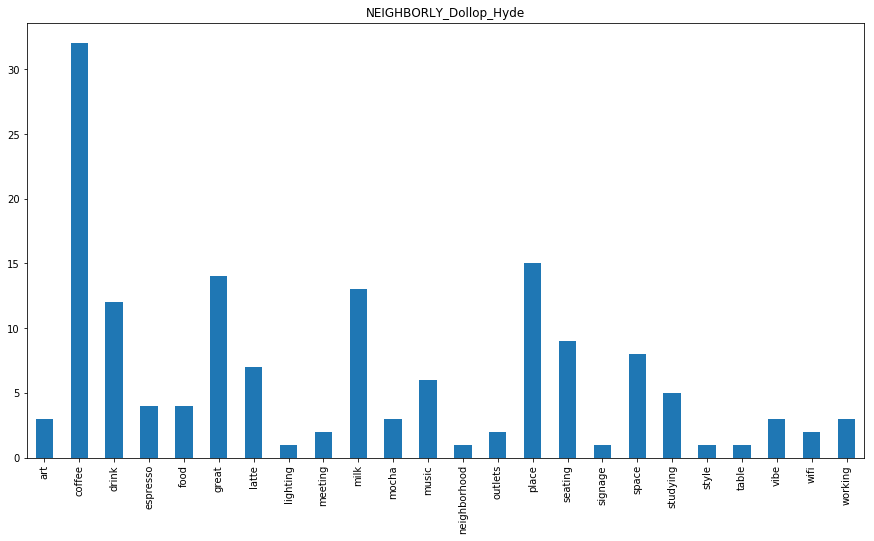

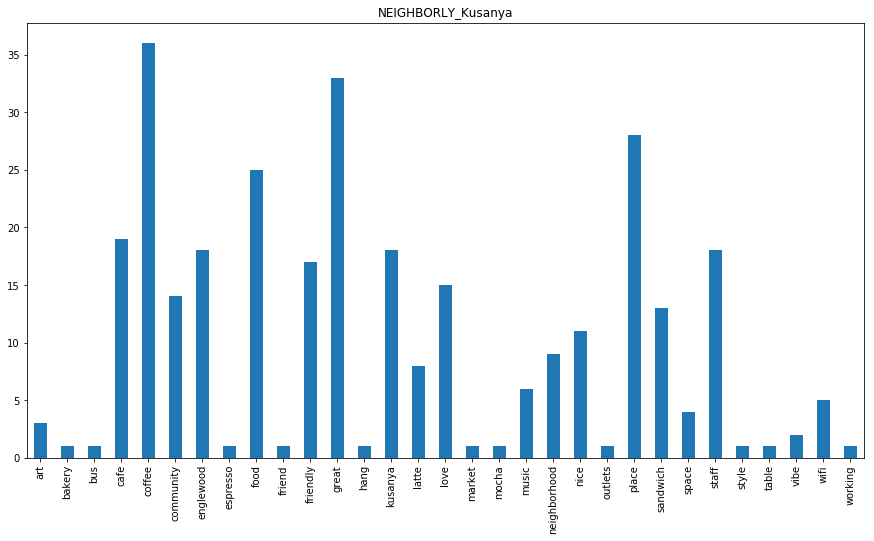

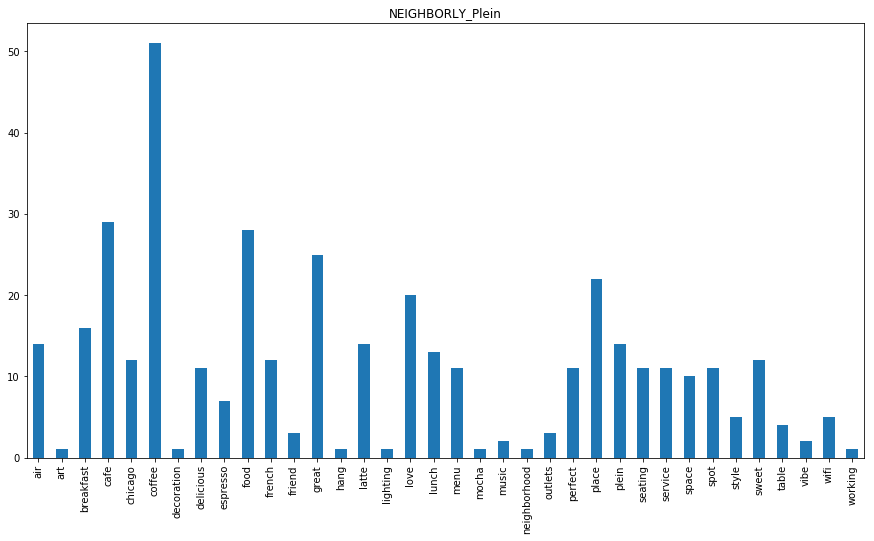

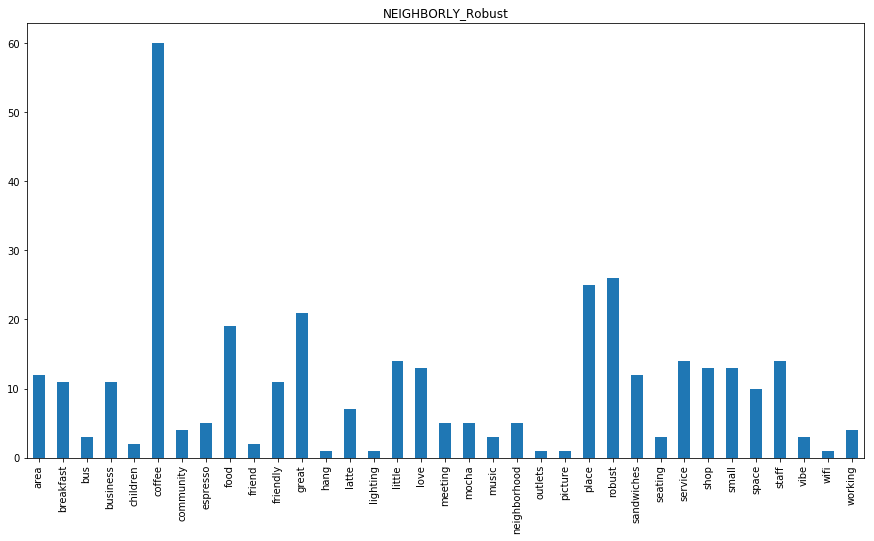

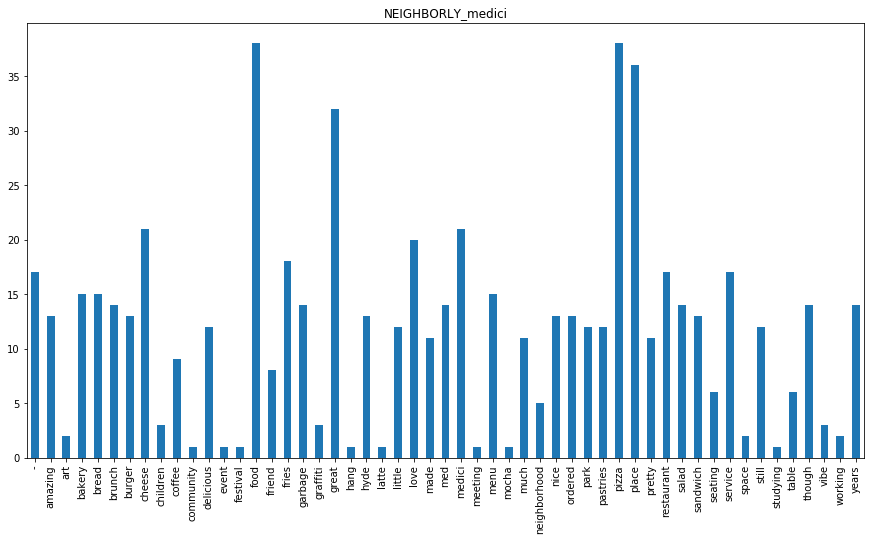

In [11]:
def createplot (csv_counter):
    # Create the bar graphs of top words for each business
    # Output the bar graphs to the folder "plots"
    df_occurences = pd.DataFrame (csv_counter)
    for column in df_occurences:
        name = column.strip('scraped/').strip('.csv')
        plot = df_occurences[column].dropna()
        plot.plot(kind="bar")
        plt.title(name)
        fig = plt.gcf()
        fig.set_size_inches(15,8)
        plt.savefig('plots/' + name + '.png', bbox_inches='tight')
        plt.show()
        
createplot(csv_counter)

In [12]:
def pipeline ():
    review_files, csv_reviews, names, csv_files = getReviews ()
    review_files.to_csv ('first50_reviews.csv')
    word_list = createWordList (csv_reviews)
    csv_counter = findWordFreq (word_list)
    createplot(csv_counter)
    
#pipeline()

In [13]:
def GroupByLocation (names):
    listOfGroups = []
    for name in names:
        listOfGroups.append ( name.split('_')[0])
    setOfGroups = set (listOfGroups)
    
    placeAndReviews = {}
    for group in setOfGroups:
        placeAndReviews[group] = ''
        
    for i in range (len (names)):
        group = names[i].split('_')[0]
        review = placeAndReviews.get(group)
        placeAndReviews[group] = review + word_list[i]
     
    groups = []
    reviews = []
    for key, val in placeAndReviews.items():
        groups.append (key)
        reviews.append (val)
    #return placeAndReviews
    return (groups, reviews)
     
groups, groupReviews = GroupByLocation (names)

In [ ]:
placeAndReviews.keys()

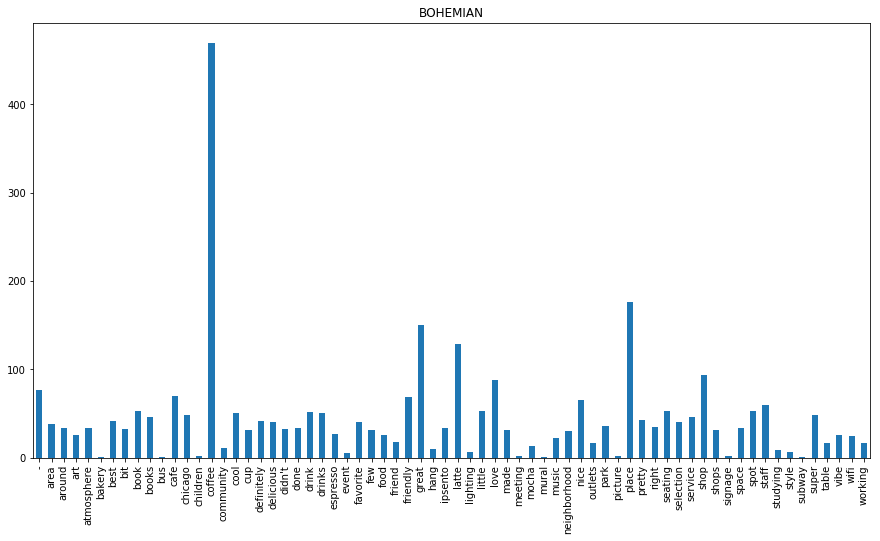

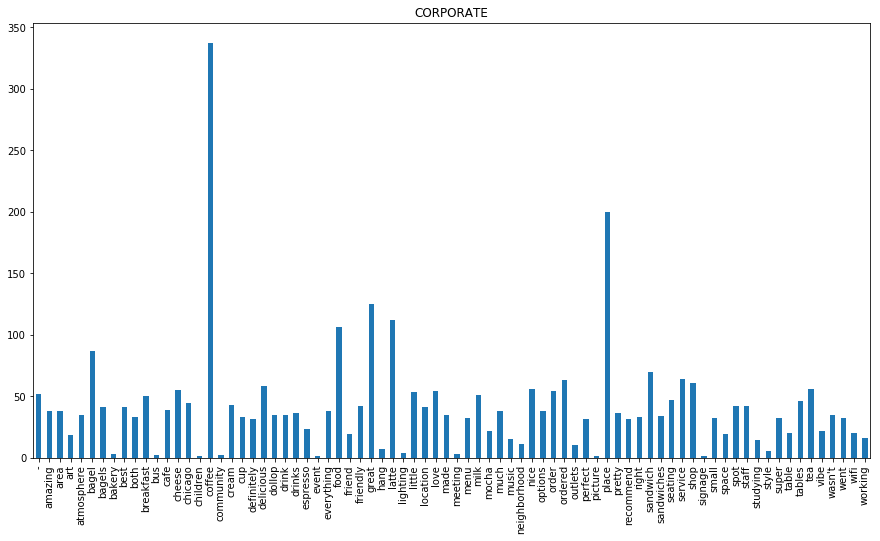

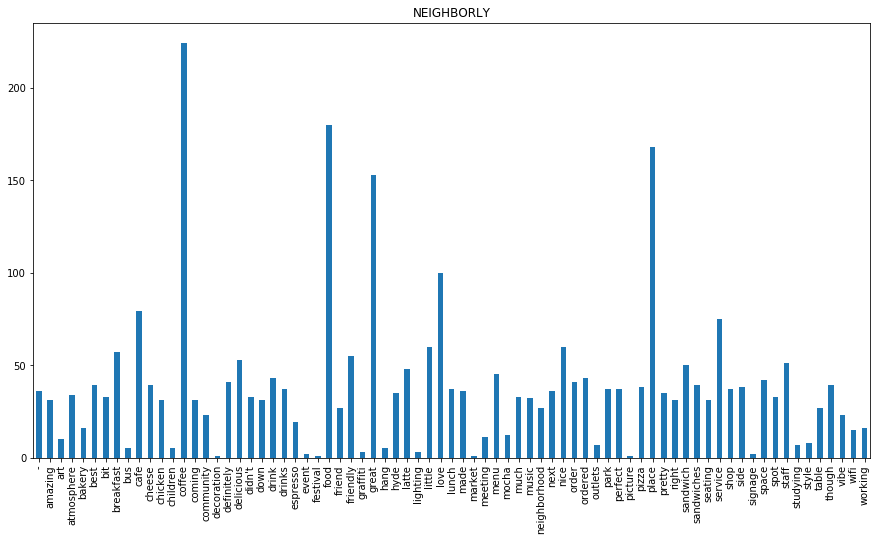

In [26]:
groupWordList = findWordFreq (groupReviews, groups, threshold=30)
createplot (groupWordList)
#groupWordList